In [531]:
sns.set_theme(); 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import datetime

In [2]:
dp_main = pd.read_csv("DOSPALOS_MAIN.csv")
dp_billing = pd.read_csv("DOSPALOS_BILLING.csv")
dp_interval1 = pd.read_excel("DOSPALOS_INTERVAL.xlsm")

In [123]:
##1) sort only for single family homes 2) look at 12 month period for each home . gas and elec. for each home
dp_billing.head()
#if start date is certian month, consider as that month

,ANON_SA_ID,SERV_TYPE,KWH,THRM,revn_amt,START_DT,END_DT
0,534871,G,NaN,0.0,2.86,21OCT2019,19NOV2019
1,534871,G,NaN,0.0,2.76,23AUG2019,20SEP2019
2,534871,G,NaN,0.0,2.95,19NOV2019,19DEC2019
3,534871,G,NaN,0.0,3.06,20SEP2019,21OCT2019
4,534871,G,NaN,0.0,3.25,19DEC2019,21JAN2020


In [124]:
dp_interval = dp_interval1.copy()

In [125]:
house_ids = dp_interval["ANON_SERVPNT_ID"].unique()
interval_2 = pd.DataFrame()

for i in house_ids:
    temp = dp_interval.loc[dp_interval["ANON_SERVPNT_ID"] == i]
    #start_date = '2018-12-31'
    #end_date = '2019-12-31'
    #mask = (temp['usg_dt'] > start_date) & (temp['usg_dt'] <= end_date)
    #temp = temp.loc[mask]

    if len(temp["KWH"]) == 8759:
        interval_2[i] = temp.iloc[:,3].values

In [126]:
interval_2.loc[:,'Total'] = interval_2.sum(axis=1)
bottom_row = interval_2.sum(axis=0)

In [127]:
temp2 = dp_interval.loc[dp_interval["ANON_SERVPNT_ID"] == 2210113]
# interval_2["date"] = temp2.iloc[:,1].values
# interval_2["hour"] = temp2.iloc[:,2].values

In [128]:
loc = 0
column = "date"
value = temp2.iloc[:,1].values
interval_2.insert(loc, column, value)
loc = 1
column = "hour"
value = temp2.iloc[:,2].values
interval_2.insert(loc, column, value)

In [129]:
interval_2.loc['Total',:] = bottom_row

In [133]:
interval_2.to_csv(r'Dos_Palos_Y_Interval.csv')

In [134]:
sns.displot(interval_2, x="Total")

Error in callback <function flush_figures at 0x7fb7da87c700> (for post_execute):


KeyboardInterrupt: 

In [205]:
top_5_peak = interval_2.sort_values("Total", ascending = False).head()
top_5_peak

,date,hour,510042,1410083,2210113,4010063,17210022,19110013,27210088,31310110,...,245010076,248910068,249410102,254710091,255710074,257210059,262810088,264610038,271310066,Total
Total,NaN,NaN,12907.92,203.83,1114.73,9293.79,7563.54,1912.85,10299.86,8436.33,...,5568.89,6662.38,2868.33,9028.50,11181.02,-407.74,17486.73,14013.35,5570.36,715072.47
5464,2019-08-16 00:00:00,18.0,4.00,2.40,0.63,5.54,1.72,0.22,4.15,3.84,...,0.43,4.96,0.20,0.07,1.20,-0.10,5.56,2.44,0.66,301.42
5442,2019-08-15 00:00:00,20.0,6.85,3.42,0.64,5.33,1.63,0.23,3.56,2.76,...,0.44,2.91,0.28,0.07,5.00,1.71,5.40,2.83,3.16,293.95
5465,2019-08-16 00:00:00,19.0,3.37,2.85,0.64,5.30,1.73,0.22,4.51,2.72,...,0.43,4.69,0.22,0.07,1.08,9.36,5.25,2.09,1.21,292.56
5440,2019-08-15 00:00:00,18.0,3.45,2.40,0.63,5.61,1.57,0.26,4.58,3.54,...,0.41,3.27,0.24,1.89,3.24,-2.76,7.89,1.83,0.55,283.60


<AxesSubplot:xlabel='Total'>

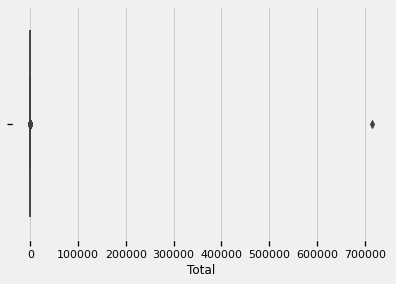

In [206]:
#boxplot
sns.boxplot(x = interval_2['Total'])

In [207]:
interval_2.loc[interval_2["date"] == '2019-01-01 00:00:00']

,date,hour,510042,1410083,2210113,4010063,17210022,19110013,27210088,31310110,...,245010076,248910068,249410102,254710091,255710074,257210059,262810088,264610038,271310066,Total


In [208]:
july_1 = interval_2.loc[interval_2["date"] == '2019-07-01 00:00:00']

In [209]:
july_1.head()

,date,hour,510042,1410083,2210113,4010063,17210022,19110013,27210088,31310110,...,245010076,248910068,249410102,254710091,255710074,257210059,262810088,264610038,271310066,Total


In [211]:
merged = dp_interval.merge(dp_main, on = "ANON_SERVPNT_ID", how = 'inner')

In [212]:
len(merged)/8760

155.6947488584475

In [213]:
merged.drop(axis = 1, columns = ["Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7"], inplace = True)

In [214]:
len(merged["ANON_SERVPNT_ID"].unique())

121

In [215]:
house_ids = dp_interval["ANON_SERVPNT_ID"].unique()

In [216]:
d = {}
for name in house_ids:
    d[name] = pd.DataFrame()

In [217]:
def new_df(original_df, ids):
    for i in ids:
        d[i] = original_df.loc[original_df["ANON_SERVPNT_ID"] == i]
new_df(dp_interval, house_ids)      

In [218]:
d[house_ids[1]]

,ANON_SERVPNT_ID,usg_dt,INT_HOUR,KWH,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
8759,510042,2019-01-01,1,0.37,NaN,NaN,NaN,NaN
8760,510042,2019-01-01,2,1.17,NaN,NaN,NaN,NaN
8761,510042,2019-01-01,3,1.94,NaN,NaN,NaN,NaN
8762,510042,2019-01-01,4,3.07,NaN,NaN,NaN,NaN
8763,510042,2019-01-01,5,7.29,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
17513,510042,2019-12-31,20,3.24,NaN,NaN,NaN,NaN
17514,510042,2019-12-31,21,0.61,NaN,NaN,NaN,NaN
17515,510042,2019-12-31,22,0.52,NaN,NaN,NaN,NaN
17516,510042,2019-12-31,23,0.51,NaN,NaN,NaN,NaN


In [220]:
new_df2 = pd.DataFrame()
for i in range(2):
    new_df2[i] = d[house_ids[i]]["KWH"]
    print(new_df2[i])
    #print(len(d[house_ids[i]]["KWH"])==8759)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8754    0.0
8755    0.0
8756    0.0
8757    0.0
8758    0.0
Name: 0, Length: 8759, dtype: float64
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8754   NaN
8755   NaN
8756   NaN
8757   NaN
8758   NaN
Name: 1, Length: 8759, dtype: float64


In [222]:
new_df(merged, house_ids)

In [223]:
d[house_ids[120]]

,ANON_SERVPNT_ID,usg_dt,INT_HOUR,KWH,ANON_ACCT_ID,ANON_SA_ID,MultiFam,MasterMeter
1361470,272410042,2019-01-01,1,5.27,22815803,9258620883,INDIV,Other
1361471,272410042,2019-01-01,2,3.07,22815803,9258620883,INDIV,Other
1361472,272410042,2019-01-01,3,3.16,22815803,9258620883,INDIV,Other
1361473,272410042,2019-01-01,4,3.19,22815803,9258620883,INDIV,Other
1361474,272410042,2019-01-01,5,3.12,22815803,9258620883,INDIV,Other
...,...,...,...,...,...,...,...,...
1363881,272410042,2019-04-11,13,1.21,22815803,9258620883,INDIV,Other
1363882,272410042,2019-04-11,14,1.25,22815803,9258620883,INDIV,Other
1363883,272410042,2019-04-11,15,1.14,22815803,9258620883,INDIV,Other
1363884,272410042,2019-04-11,16,1.15,22815803,9258620883,INDIV,Other


In [224]:
e = {}
for name in house_ids:
    e[name] = pd.DataFrame()

In [225]:
def new_df(original_df, ids):
    for i in ids:
        e[i] = original_df.loc[original_df["ANON_SA_ID"] == i]
#new_df(dp_interval, house_ids)     

In [226]:
new_ids = merged["ANON_SA_ID"].unique()

In [227]:
new_df(dp_billing, new_ids)

In [234]:
indiv = dp_main.loc[dp_main["MultiFam"] == "INDIV"]

In [235]:
unique_indiv = indiv["ANON_SA_ID"].unique()
unique_indiv2 = indiv["ANON_SERVPNT_ID"].unique()

In [492]:
indiv_billing = dp_billing.loc[dp_billing["ANON_SA_ID"].isin(unique_indiv)]

In [493]:
for i in indiv_billing.index:
    if "JAN" in indiv_billing["START_DT"][i]:
        indiv_billing.at[i, 'month'] = "JAN"
    elif "FEB" in indiv_billing["START_DT"][i]:
        indiv_billing.at[i, 'month'] = "FEB"
    elif "MAR" in indiv_billing["START_DT"][i]:
        indiv_billing.at[i, 'month'] = "MAR"
    elif "APR" in indiv_billing["START_DT"][i]:
        indiv_billing.at[i, 'month'] = "APR"
    elif "MAY" in indiv_billing["START_DT"][i]:
        indiv_billing.at[i, 'month'] = "MAY"
    elif "JUN" in indiv_billing["START_DT"][i]:
        indiv_billing.at[i, 'month'] = "JUN"
    elif "JUL" in indiv_billing["START_DT"][i]:
        indiv_billing.at[i, 'month'] = "JUL"
    elif "AUG" in indiv_billing["START_DT"][i]:
        indiv_billing.at[i, 'month'] = "AUG"
    elif "SEP" in indiv_billing["START_DT"][i]:
        indiv_billing.at[i, 'month'] = "SEP"
    elif "OCT" in indiv_billing["START_DT"][i]:
        indiv_billing.at[i, 'month'] = "OCT"
    elif "NOV" in indiv_billing["START_DT"][i]:
        indiv_billing.at[i, 'month'] = "NOV"
    elif "DEC" in indiv_billing["START_DT"][i]:
        indiv_billing.at[i, 'month'] = "DEC"   

/Users/teacher/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/teacher/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [497]:
indiv_billing.groupby("month").mean()

,ANON_SA_ID,KWH,THRM,revn_amt
month,,,,
APR,5.035784e+09,439.412192,18.955899,69.462016
AUG,5.034766e+09,783.719836,13.628072,106.048409
DEC,5.044169e+09,608.154706,60.300983,104.459770
FEB,5.044684e+09,466.451509,42.599374,81.882081
JAN,5.042271e+09,580.109181,60.825537,103.635513
JUL,5.019929e+09,933.743719,12.564776,121.347349
JUN,5.083887e+09,814.852918,13.663859,115.213215
MAR,5.041234e+09,439.455290,28.531556,72.462848
MAY,5.031533e+09,661.883289,15.775501,90.590056


In [499]:
jul_houses = indiv_billing.loc[indiv_billing["month"] == "JUL"]

In [500]:
len(jul_houses["ANON_SA_ID"].unique())

4972

In [503]:
indiv_interval = dp_interval.loc[dp_interval["ANON_SERVPNT_ID"].isin(unique_indiv2)]

In [505]:
house_ids = indiv_interval["ANON_SERVPNT_ID"].unique()
interval_2 = pd.DataFrame()
house_ids2 = []
for i in house_ids:
    temp = indiv_interval.loc[indiv_interval["ANON_SERVPNT_ID"] == i]
    #start_date = '2018-12-31'
    #end_date = '2019-12-31'
    #mask = (temp['usg_dt'] > start_date) & (temp['usg_dt'] <= end_date)
    #temp = temp.loc[mask]

    if len(temp["KWH"]) == 8759:
        interval_2[i] = temp.iloc[:,3].values
        house_ids2.append(i)
interval_2.loc[:,'Total'] = interval_2.sum(axis=1)
bottom_row = interval_2.sum(axis=0)
loc = 0
column = "date"
value = temp2.iloc[:,1].values
interval_2.insert(loc, column, value)
loc = 1
column = "hour"
value = temp2.iloc[:,2].values
interval_2.insert(loc, column, value)
interval_2.loc['Total',:] = bottom_row

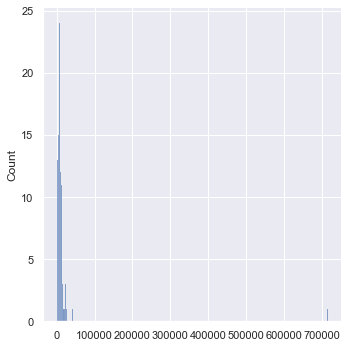

In [506]:
sns.displot(x=bottom_row)

In [508]:
bottom_row2 = bottom_row[0:84]

In [509]:
graph_df = pd.DataFrame()
graph_df["ID"] = house_ids2
value = bottom_row2.values
graph_df.insert(1, "Annual Total", value)


In [510]:
(graph_df["Annual Total"].sum())/len(graph_df)

8512.767499999984

<AxesSubplot:xlabel='ID', ylabel='Annual Total'>

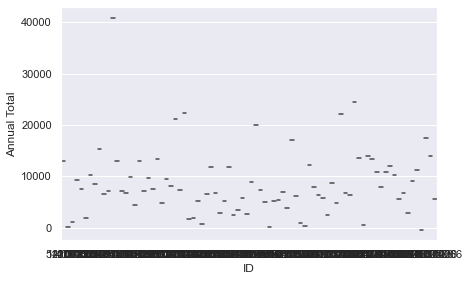

In [511]:
sns.violinplot(x="ID", y="Annual Total", data=graph_df)

Text(0.5, 1.0, 'Annual Total kWh, Individual Houses')

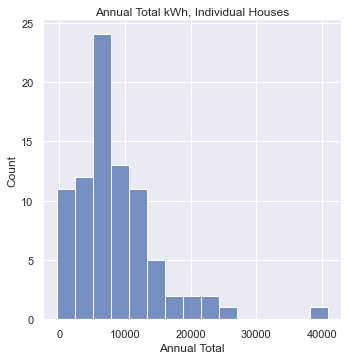

In [541]:
sns.displot(graph_df, x="Annual Total")
plt.title("Annual Total kWh, Individual Houses")

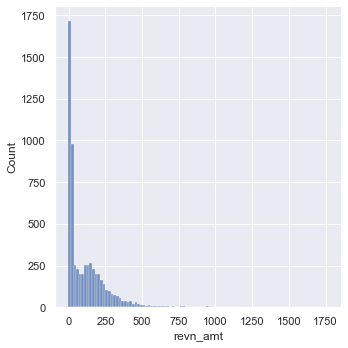

In [514]:
sns.displot(jul_houses, x="revn_amt")

In [523]:
indiv_billing_gas = indiv_billing.loc[indiv_billing["SERV_TYPE"] == "G"]
indiv_billing_gas["THRM (kWh)"] = indiv_billing_gas["THRM"]/0.034121412
indiv_billing_elec = indiv_billing.loc[indiv_billing["SERV_TYPE"] == "E"]

<ipython-input-523-8a7e4d018652>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indiv_billing_gas["THRM (kWh)"] = indiv_billing_gas["THRM"]/0.034121412


In [524]:
len(indiv_billing_gas["ANON_SA_ID"].unique())

2132

In [525]:
len(indiv_billing_gas["ANON_SA_ID"])/12

1976.25

<AxesSubplot:xlabel='KWH', ylabel='Count'>

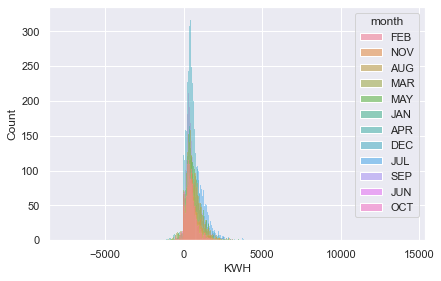

In [532]:
sns.histplot(data=indiv_billing_elec, x="KWH", hue="month")

In [535]:
indiv_billing_1 = indiv_billing_gas.loc[indiv_billing_gas["month"] == "JAN"]
indiv_billing_1_e = indiv_billing_elec.loc[indiv_billing_elec["month"] == "JAN"]

indiv_billing_2 = indiv_billing_gas.loc[indiv_billing_gas["month"] == "FEB"]
indiv_billing_2_e = indiv_billing_elec.loc[indiv_billing_elec["month"] == "FEB"]


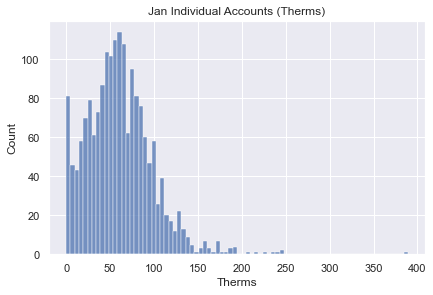

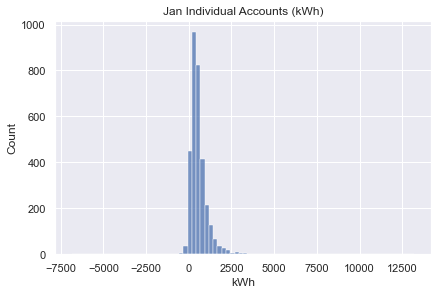

In [539]:
sns.histplot(indiv_billing_1, x = indiv_billing_1['THRM'], bins = 80, label = 'Gas')
plt.title("Jan Individual Accounts (Therms)")
plt.xlabel("Therms")

plt.show()

sns.histplot(indiv_billing_1_e, x = indiv_billing_1_e['KWH'], bins = 80, label = 'Elec')
plt.title("Jan Individual Accounts (kWh)")
plt.xlabel("kWh")

plt.show()



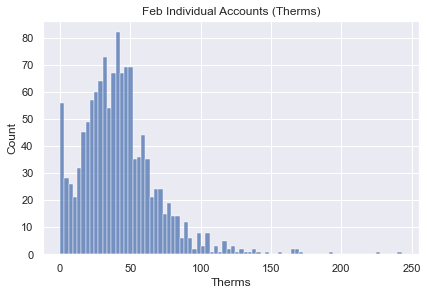

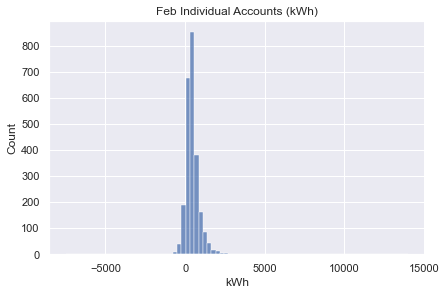

In [540]:
sns.histplot(indiv_billing_2, x = indiv_billing_2['THRM'], bins = 80, label = 'Gas')
plt.title("Feb Individual Accounts (Therms)")
plt.xlabel("Therms")

plt.show()

sns.histplot(indiv_billing_2_e, x = indiv_billing_2_e['KWH'], bins = 80, label = 'Elec')
plt.title("Feb Individual Accounts (kWh)")
plt.xlabel("kWh")

plt.show()

